In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Load Titanic dataset (available in seaborn)
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [ ]:
# Step 1: View dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Step 2: Drop irrelevant columns (like 'deck' - too many missing, and 'embark_town')
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'adult_male', 'who'], axis=1)

In [ ]:
# Number of missing cases against each column
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
alone,0


In [ ]:
# Missing count and percentage
missing_data = titanic.isnull().sum().to_frame('Missing Values')
missing_data['% Missing'] = (titanic.isnull().mean() * 100).round(2)
print(missing_data)

          Missing Values  % Missing
survived               0        0.0
pclass                 0        0.0
sex                    0        0.0
age                    0        0.0
sibsp                  0        0.0
parch                  0        0.0
fare                   0        0.0
embarked               0        0.0
alone                  0        0.0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [ ]:
# Step 3: Handle missing values
titanic['age'] = titanic['age'].fillna(titanic['age'].median())    # Fill missing age with median
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])  # Fill embarked with mode

In [ ]:
# Step 4: Encode categorical variables
label_encoders = {}
for col in titanic.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col].astype(str))
    label_encoders[col] = le

In [ ]:
# Step 5: Define features and target
X = titanic.drop('survived', axis=1)
y = titanic['survived']
y.head()
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(179, 14)

In [ ]:
y_train.shape
y_test.shape

(179,)

In [ ]:
# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Display results
print("Before scaling:\n", X_train.head())
print("\nAfter scaling (first 5 rows):\n", X_train_scaled[:5])

Before scaling:
      pclass  sex   age  sibsp  parch     fare  embarked  alone
331       1    1  45.5      0      0  28.5000         2   True
733       2    1  23.0      0      0  13.0000         2   True
382       3    1  32.0      0      0   7.9250         2   True
704       3    1  26.0      1      0   7.8542         2  False
813       3    0   6.0      4      2  31.2750         2  False

After scaling (first 5 rows):
 [[-1.61413602  0.7243102   1.25364106 -0.47072241 -0.47934164 -0.07868358
   0.5635246   0.81220297]
 [-0.40055118  0.7243102  -0.47728355 -0.47072241 -0.47934164 -0.37714494
   0.5635246   0.81220297]
 [ 0.81303367  0.7243102   0.21508629 -0.47072241 -0.47934164 -0.47486697
   0.5635246   0.81220297]
 [ 0.81303367  0.7243102  -0.24649361  0.37992316 -0.47934164 -0.47623026
   0.5635246  -1.23121934]
 [ 0.81303367 -1.38062393 -1.78509326  2.93185988  2.04874166 -0.02524937
   0.5635246  -1.23121934]]


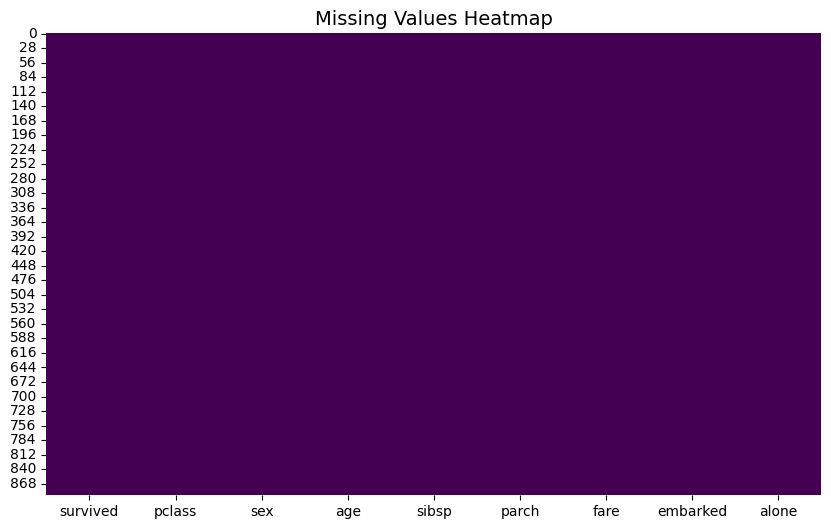

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values (yellow = missing)
plt.figure(figsize=(10,6))
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [ ]:
# 1. Explore the dataset
print(df.head())         # First 5 rows
print(df.tail())         # Last 5 rows
print(df.shape)          # Shape (rows, cols)
print(df.describe())     # Summary statistics
print(df.columns)        # Column names
print(df.index)          # Index values
print(df.values[:5])     # Raw values (first 5)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0        

In [ ]:
# 2. Transpose and sort
print(df.T)                           # Transpose
print(df.sort_index(axis=0).head())   # Sort by row index
print(df.sort_values(by="sepal length (cm)").head())  # Sort by column values

                   0    1    2    3    4    5    6    7    8    9    ...  140  \
sepal length (cm)  5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  4.4  4.9  ...  6.7   
sepal width (cm)   3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4  2.9  3.1  ...  3.1   
petal length (cm)  1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4  1.5  ...  5.6   
petal width (cm)   0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2  0.2  0.1  ...  2.4   
target             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.0   

                   141  142  143  144  145  146  147  148  149  
sepal length (cm)  6.9  5.8  6.8  6.7  6.7  6.3  6.5  6.2  5.9  
sepal width (cm)   3.1  2.7  3.2  3.3  3.0  2.5  3.0  3.4  3.0  
petal length (cm)  5.1  5.1  5.9  5.7  5.2  5.0  5.2  5.4  5.1  
petal width (cm)   2.3  1.9  2.3  2.5  2.3  1.9  2.0  2.3  1.8  
target             2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  

[5 rows x 150 columns]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1

In [ ]:
# 3. Create ratio of two variables
df["sepal_ratio"] = df["sepal length (cm)"] / df["sepal width (cm)"]

In [ ]:
# 4. Insert blank column
df["blank_col"] = ""   # Add empty column with name
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  sepal_ratio blank_col  
0       0     1.457143            
1       0     1.633333            
2       0     1.468750            
3       0     1.483871            
4       0     1.388889            


In [ ]:
# 5. Slice and dice using loc/iloc
# Select two columns
print(df.loc[:, ["sepal length (cm)", "petal length (cm)"]].head())


   sepal length (cm)  petal length (cm)
0                5.1                1.4
1                4.9                1.4
2                4.7                1.3
3                4.6                1.5
4                5.0                1.4


In [ ]:
# Select first 5 rows with iloc
print(df.iloc[0:5])


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  sepal_ratio blank_col  
0       0     1.457143            
1       0     1.633333            
2       0     1.468750            
3       0     1.483871            
4       0     1.388889            


In [ ]:
# Select specific rows (say rows 10 and 20) with loc
print(df.loc[[10, 20]])

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
10                5.4               3.7                1.5               0.2   
20                5.4               3.4                1.7               0.2   

    target  sepal_ratio blank_col  
10       0     1.459459            
20       0     1.588235            


In [ ]:
# Square bracket style column selection
print(df["sepal length (cm)"].head())

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64


In [ ]:
# 6. Row filter condition
# Example: rows where petal length > 1.5
filtered = df[df["petal length (cm)"] > 1.5]
print(filtered.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
5                 5.4               3.9                1.7               0.4   
11                4.8               3.4                1.6               0.2   
18                5.7               3.8                1.7               0.3   
20                5.4               3.4                1.7               0.2   
23                5.1               3.3                1.7               0.5   

    target  sepal_ratio blank_col  
5        0     1.384615            
11       0     1.411765            
18       0     1.500000            
20       0     1.588235            
23       0     1.545455            


In [ ]:
# Import libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import cv2   # for resize

In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

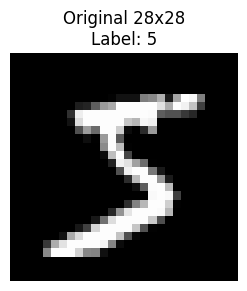

In [ ]:
# Original Image
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Original 28x28\nLabel: {y_train[0]}")
plt.axis("off")

In [ ]:
print("Original shape:", X_train.shape)  # (60000, 28, 28)

Original shape: (60000, 28, 28)


In [ ]:
# 1. Reshape (for ML models like dense layers)
X_train_reshaped = X_train.reshape(X_train.shape[0], 28*28)
X_test_reshaped  = X_test.reshape(X_test.shape[0], 28*28)
print("After reshape:", X_train_reshaped.shape)  # (60000, 784)

After reshape: (60000, 784)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

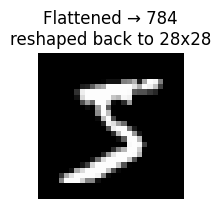

In [ ]:
# Reshape (flatten)
X_train_flat = X_train.reshape(-1, 28*28)
plt.subplot(1,3,2)
plt.imshow(X_train_flat[0].reshape(28,28), cmap="gray")
plt.title("Flattened → 784\nreshaped back to 28x28")
plt.axis("off")

In [ ]:
# 2. Normalize pixel values (0-255 → 0-1)
X_train_norm = X_train_reshaped.astype("float32") / 255
X_test_norm  = X_test_reshaped.astype("float32") / 255

In [ ]:
# 3. One-hot encode target
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)


In [ ]:
print("y_train one-hot shape:", y_train_cat.shape)  # (60000, 10)


y_train one-hot shape: (60000, 10)


In [ ]:
# 4. Resize images (say from 28x28 → 32x32)
X_train_resized = np.array([cv2.resize(img, (32,32)) for img in X_train])
X_test_resized  = np.array([cv2.resize(img, (32,32)) for img in X_test])
print("After resize:", X_train_resized.shape)  # (60000, 32, 32)

After resize: (60000, 32, 32)


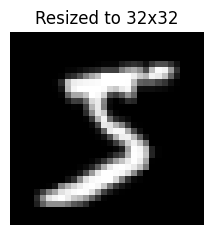

In [ ]:
# Resize to 32x32
resized_img = cv2.resize(X_train[0], (32,32))
plt.subplot(1,3,3)
plt.imshow(resized_img, cmap="gray")
plt.title("Resized to 32x32")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# 5. Reshape resized images for CNN (batch, height, width, channel)
X_train_cnn = X_train_resized.reshape(-1, 32, 32, 1)
X_test_cnn  = X_test_resized.reshape(-1, 32, 32, 1)
print("For CNN input:", X_train_cnn.shape)  # (60000, 32, 32, 1)

For CNN input: (60000, 32, 32, 1)


In [ ]:
df=